In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import sys

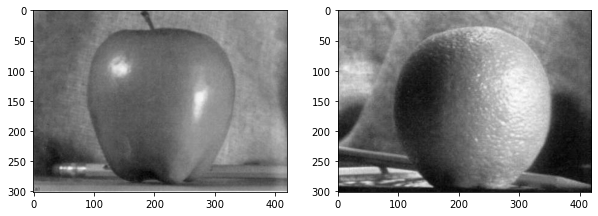

In [2]:
image1 = cv2.imread("manzana.jpg", 0)
image2= cv2.imread("naranja.jpg",0)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image2, cmap='gray')
plt.show()

In [3]:
def Get2P(x):
    return 2**(x-1).bit_length()

 
def Get2Pl( x):
 
    # Invalid input
    if (x < 1 ):
        return 0,0
  
    res = 1
    
    #Try all powers starting from 2^1
    for i in range(8*sys.getsizeof(x)):
     
        curr = 1 << i
  
        # If current power is more than n, break
        if (curr > x):
             break
  
        res = curr
    
  
    return res



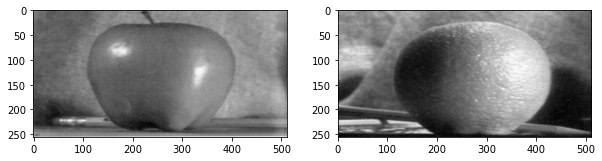

In [4]:
newsize_rows=Get2P(image1.shape[0]) if (abs(image1.shape[0]-Get2P(image1.shape[0]))<abs(image1.shape[0]-Get2Pl(image1.shape[0]))) else Get2Pl(image1.shape[0])
newsize_cols=Get2P(image1.shape[1]) if (abs(image1.shape[1]-Get2P(image1.shape[1]))<abs(image1.shape[1]-Get2Pl(image1.shape[1]))) else Get2Pl(image1.shape[1])


image1r=cv2.resize(image1, (newsize_cols, newsize_rows))
image2r=cv2.resize(image2, (newsize_cols, newsize_rows))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image1r, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image2r, cmap='gray')
plt.show()

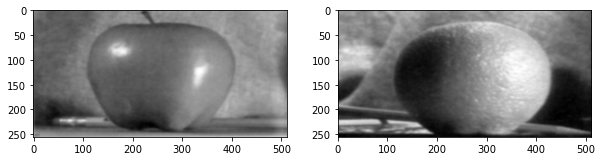

In [5]:
gaussianReduction1= cv2.pyrDown(image1r)
gaussianReduction2= cv2.pyrDown(image2r)
gaussianIncrease1= cv2.pyrUp(gaussianReduction1)
gaussianIncrease2= cv2.pyrUp(gaussianReduction2)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gaussianIncrease1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(gaussianIncrease2, cmap='gray')
plt.show()

In [6]:
mask1=np.zeros_like(image1r, dtype="uint8")
mask2=np.zeros_like(image2r, dtype="uint8")
mask1[:,:mask1.shape[1]//2]=1
mask2[:,mask2.shape[1]//2:]=1

gaussianPyramid1=[]
gaussianPyramid2=[]
i_gaussianPyramid1=[]
i_gaussianPyramid2=[]
laplaPyramid1=[]
laplaPyramid2=[]
maskPyramid1=[]
maskPyramid2=[]

semiresultPyramid=[]

maskPyramid1.append(mask1)
maskPyramid2.append(mask2)


gaussianPyramid1.append(image1r)
gaussianPyramid2.append(image2r)
for i in range(0,3):
    gaussianPyramid1.append(cv2.pyrDown(gaussianPyramid1[i]))
    gaussianPyramid2.append(cv2.pyrDown(gaussianPyramid2[i]))
    
    i_gaussianPyramid1.append(cv2.pyrUp(gaussianPyramid1[i+1]))
    i_gaussianPyramid2.append(cv2.pyrUp(gaussianPyramid2[i+1]))
    
    laplaPyramid1.append(gaussianPyramid1[i]-i_gaussianPyramid1[i])
    laplaPyramid2.append(gaussianPyramid2[i]-i_gaussianPyramid2[i])
    
    maskPyramid1.append(cv2.pyrDown(maskPyramid1[i]))
    maskPyramid2.append(cv2.pyrDown(maskPyramid2[i]))
    
    semiresultPyramid.append((laplaPyramid1[i]*maskPyramid1[i])+(laplaPyramid2[i]*maskPyramid2[i]))
    

    
    
    
    
    



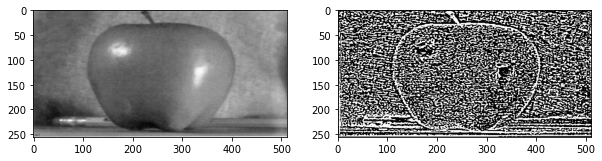

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gaussianPyramid1[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(laplaPyramid1[0], cmap='gray')
plt.show()

In [8]:
baseresult1=i_gaussianPyramid1[2]*maskPyramid1[2]

baseresult2=i_gaussianPyramid2[2]*maskPyramid2[2]

baseresult=baseresult1+baseresult2+semiresultPyramid[2]

Results=[]

Results.append(baseresult)

for i in range(0,2):
    Results.append(cv2.pyrUp(Results[i])+semiresultPyramid[2-i-1])
    
print(len(Results))


3


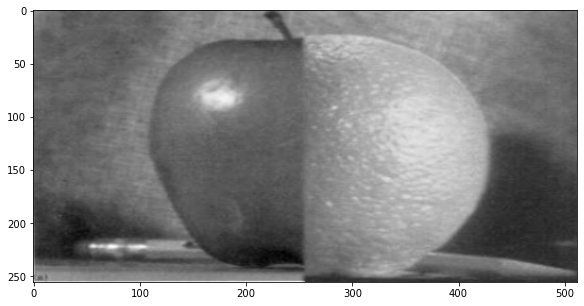

In [9]:
plt.figure(figsize=(10,5))

plt.imshow(Results[2], cmap='gray')

plt.show()

## Part 2

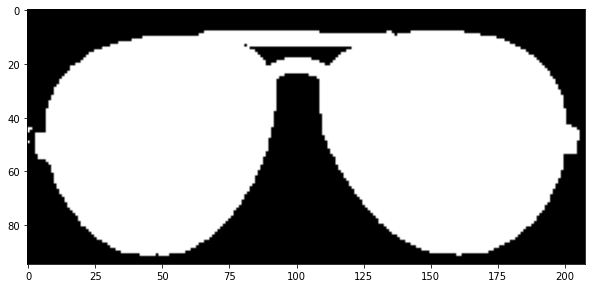

In [46]:
sunglasses = cv2.imread("sung.png", cv2.IMREAD_UNCHANGED)
_, sunglasses_mask = cv2.threshold(sunglasses[:, :, 3], 0, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10,5))

plt.imshow(sunglasses_mask, cmap='gray')

plt.show()

In [47]:
src1 = cv2.imread('summer.jpg')
src2 = cv2.imread('autum.jpg')

src2 = cv2.resize(src2, src1.shape[1::-1])

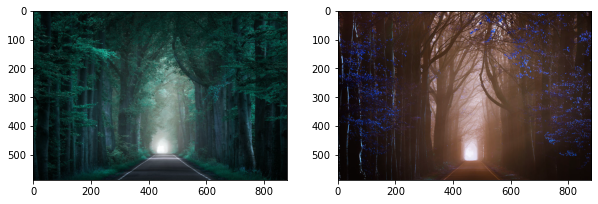

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(src1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(src2, cmap='gray')
plt.show()

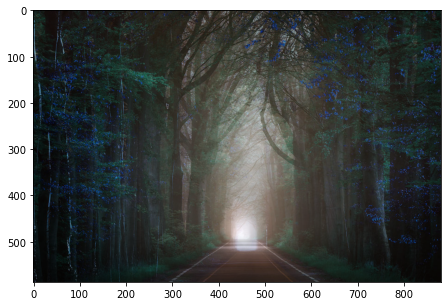

In [49]:
dsti = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
plt.figure(figsize=(10,5))

plt.imshow(dsti, cmap='gray')

plt.show()

(587, 880, 3)


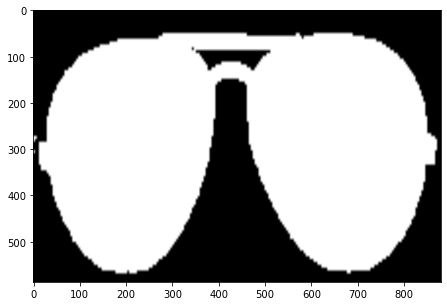

In [50]:
sunglasses_mask=cv2.resize(sunglasses_mask, src1.shape[1::-1])
sunglasses_mask=cv2.cvtColor(sunglasses_mask, cv2.COLOR_GRAY2BGR)
print(sunglasses_mask.shape)

plt.figure(figsize=(10,5))

plt.imshow(sunglasses_mask, cmap='gray')

plt.show()

In [51]:
dst = cv2.bitwise_and(dsti, sunglasses_mask)

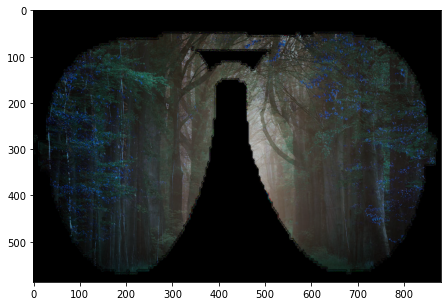

In [52]:
plt.figure(figsize=(10,5))

plt.imshow(dst, cmap='gray')

plt.show()

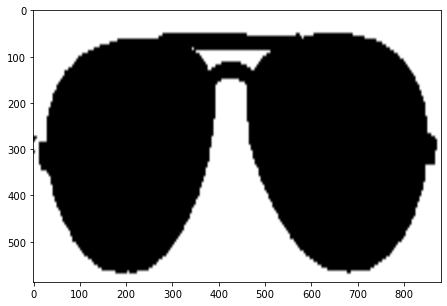

In [53]:
inverted_mask = cv2.bitwise_not(sunglasses_mask)
plt.figure(figsize=(10,5))

plt.imshow(inverted_mask, cmap='gray')

plt.show()

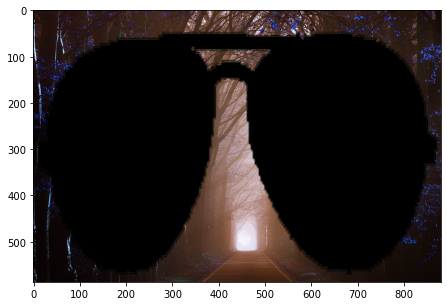

In [54]:
dst2 = cv2.bitwise_and(src2, inverted_mask)
plt.figure(figsize=(10,5))

plt.imshow(dst2)

plt.show()


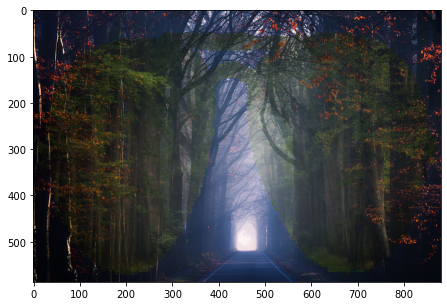

In [55]:
destinofinal=dst+dst2
destinofinal=cv2.cvtColor(destinofinal, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))

plt.imshow(destinofinal)

plt.show()

In [56]:
cv2.imwrite('resultado_parte2.jpg', destinofinal)
cv2.imwrite('resultado_parte1.jpg', Results[2])

True

## Rafael Andrade, José Luis Lobera and José Miguel de la Mora